In [1]:
from statistics import mean

from matplotlib.pyplot import plot
import pandas as pd
import numpy as np

from utils import find_nearest

In [2]:
MAX_RESISTANCE = 1000

In [3]:
STEPS = 256

In [4]:
steps = [i for i in range(STEPS)]

In [5]:
STEP = MAX_RESISTANCE / STEPS

In [6]:
STEP

3.90625

In [7]:
values = [(STEP * step) + STEP for step in steps]

In [8]:
values

[3.90625,
 7.8125,
 11.71875,
 15.625,
 19.53125,
 23.4375,
 27.34375,
 31.25,
 35.15625,
 39.0625,
 42.96875,
 46.875,
 50.78125,
 54.6875,
 58.59375,
 62.5,
 66.40625,
 70.3125,
 74.21875,
 78.125,
 82.03125,
 85.9375,
 89.84375,
 93.75,
 97.65625,
 101.5625,
 105.46875,
 109.375,
 113.28125,
 117.1875,
 121.09375,
 125.0,
 128.90625,
 132.8125,
 136.71875,
 140.625,
 144.53125,
 148.4375,
 152.34375,
 156.25,
 160.15625,
 164.0625,
 167.96875,
 171.875,
 175.78125,
 179.6875,
 183.59375,
 187.5,
 191.40625,
 195.3125,
 199.21875,
 203.125,
 207.03125,
 210.9375,
 214.84375,
 218.75,
 222.65625,
 226.5625,
 230.46875,
 234.375,
 238.28125,
 242.1875,
 246.09375,
 250.0,
 253.90625,
 257.8125,
 261.71875,
 265.625,
 269.53125,
 273.4375,
 277.34375,
 281.25,
 285.15625,
 289.0625,
 292.96875,
 296.875,
 300.78125,
 304.6875,
 308.59375,
 312.5,
 316.40625,
 320.3125,
 324.21875,
 328.125,
 332.03125,
 335.9375,
 339.84375,
 343.75,
 347.65625,
 351.5625,
 355.46875,
 359.375,
 363.281

In [9]:
# формула R = (R1 * R2) / (R1 + R2)

In [10]:
possible_values = []

In [11]:
for r1 in values:
    for r2 in values:
        possible_value = (r1 * r2) / (r1 + r2)
        possible_values.append(possible_value)

In [12]:
possible_values = sorted(list(set(possible_values)))

In [13]:
possible_values

[1.953125,
 2.6041666666666665,
 2.9296875,
 3.125,
 3.2552083333333335,
 3.3482142857142856,
 3.41796875,
 3.4722222222222223,
 3.515625,
 3.5511363636363638,
 3.5807291666666665,
 3.605769230769231,
 3.627232142857143,
 3.6458333333333335,
 3.662109375,
 3.676470588235294,
 3.689236111111111,
 3.700657894736842,
 3.7109375,
 3.7202380952380953,
 3.7286931818181817,
 3.7364130434782608,
 3.7434895833333335,
 3.75,
 3.7560096153846154,
 3.761574074074074,
 3.7667410714285716,
 3.771551724137931,
 3.7760416666666665,
 3.780241935483871,
 3.7841796875,
 3.787878787878788,
 3.791360294117647,
 3.794642857142857,
 3.7977430555555554,
 3.800675675675676,
 3.8034539473684212,
 3.8060897435897436,
 3.80859375,
 3.8109756097560976,
 3.8132440476190474,
 3.815406976744186,
 3.817471590909091,
 3.8194444444444446,
 3.8213315217391304,
 3.8231382978723403,
 3.8248697916666665,
 3.826530612244898,
 3.828125,
 3.829656862745098,
 3.8311298076923075,
 3.832547169811321,
 3.833912037037037,
 3.835227

In [14]:
len(possible_values)

31869

In [15]:
max(possible_values)

500.0

In [16]:
pt_50 = [value for value in possible_values if 40 < value < 69.3 ]

In [17]:
len(pt_50)

2285

In [18]:
pt_50

[40.0146484375,
 40.015243902439025,
 40.03299689440994,
 40.051118827160494,
 40.06901840490798,
 40.08669969512195,
 40.09789156626506,
 40.104166666666664,
 40.12142319277108,
 40.133568548387096,
 40.13847305389221,
 40.15261627906977,
 40.15531994047619,
 40.1719674556213,
 40.17857142857143,
 40.18841911764706,
 40.2046783625731,
 40.22074854651163,
 40.23663294797688,
 40.241745283018865,
 40.25233477011494,
 40.25735294117647,
 40.267857142857146,
 40.27777777777778,
 40.283203125,
 40.29837570621469,
 40.30257936507937,
 40.31337780898876,
 40.32821229050279,
 40.3343023255814,
 40.34288194444444,
 40.35738950276243,
 40.371737637362635,
 40.38592896174863,
 40.399966032608695,
 40.40948275862069,
 40.413851351351354,
 40.4275873655914,
 40.44117647058823,
 40.4546210106383,
 40.46630859375,
 40.46792328042328,
 40.48108552631579,
 40.48295454545455,
 40.49410994764398,
 40.506998697916664,
 40.50925925925926,
 40.51975388601036,
 40.532377577319586,
 40.544871794871796,
 40.5

In [19]:
psteps = [possible_values[i] - possible_values[i - 1]  for i in range(1, len(possible_values))]

In [20]:
mean(psteps)

0.015628432126270866

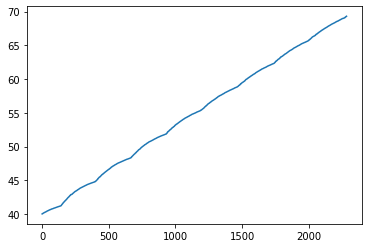

In [21]:
plot(pt_50)

In [22]:
df = pd.read_csv("data/pt_50.csv")

In [23]:
mapping_pt_50 = {r: find_nearest(pt_50, r) for r in df["R"]}

In [24]:
mapping_pt_50

{40.16: 40.15531994047619,
 40.556: 40.55477528089887,
 40.952: 40.953947368421055,
 41.348: 41.35044642857143,
 41.744: 41.738013698630134,
 42.14: 42.13627049180328,
 42.534: 42.53472222222222,
 42.928: 42.922247023809526,
 43.322: 43.31487341772152,
 43.716: 43.71488764044944,
 44.11: 44.11300505050505,
 44.504: 44.50158227848101,
 44.898: 44.886997767857146,
 45.292: 45.279947916666664,
 45.686: 45.68014705882353,
 46.08: 46.08497191011236,
 46.472: 46.466503267973856,
 46.864: 46.875,
 47.256: 47.25424757281554,
 47.648: 47.65254739336493,
 48.04: 48.04201244813278,
 48.432: 48.41549295774648,
 48.824: 48.828125,
 49.216: 49.21875,
 49.608: 49.6171357615894,
 50.0: 50.0,
 50.39: 50.38623595505618,
 50.78: 50.78125,
 51.17: 51.17545871559633,
 51.56: 51.5625,
 51.95: 51.93536931818182,
 52.34: 52.330280172413794,
 52.73: 52.734375,
 53.12: 53.125,
 53.51: 53.51336705202312,
 53.9: 53.893716577540104,
 54.288: 54.28538602941177,
 54.676: 54.67006138392857,
 55.064: 55.06400602409638

In [25]:
df_pt_100 = pd.read_csv("data/pt_100.csv")

In [26]:
pt_100 = [value for value in possible_values if 80 < value < 140 ]

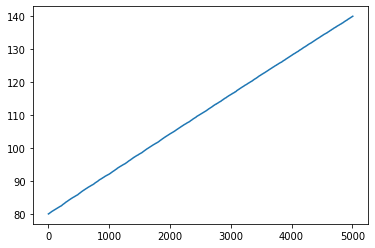

In [27]:
plot(pt_100)

In [28]:
mapping_pt_100 = {r: find_nearest(pt_100, r) for r in df_pt_100["R"]}

In [29]:
mapping_pt_100

{80.31: 80.30523255813954,
 81.1: 81.09253875968992,
 81.89: 81.89603365384616,
 82.69: 82.6875,
 83.48: 83.47602739726027,
 84.27: 84.27254098360656,
 85.06: 85.05969101123596,
 85.85: 85.84449404761905,
 86.64: 86.63974719101124,
 87.43: 87.4411610878661,
 88.22: 88.2260101010101,
 89.01: 89.00908119658119,
 89.8: 89.80129076086956,
 90.59: 90.58665644171779,
 91.37: 91.37144183168317,
 92.16: 92.16194509345794,
 92.95: 92.94181034482759,
 93.73: 93.72674851190476,
 94.52: 94.51622596153847,
 95.3: 95.29854910714286,
 96.09: 96.08147905759162,
 96.87: 96.86596820809248,
 97.65: 97.65625,
 98.44: 98.4375,
 99.22: 99.21212923728814,
 100.0: 100.0,
 100.78: 100.78679078014184,
 101.56: 101.5625,
 102.34: 102.35363924050633,
 103.12: 103.125,
 103.9: 103.88327205882354,
 104.68: 104.67637900355872,
 105.46: 105.45247395833333,
 106.24: 106.24004777070064,
 107.02: 107.00892857142857,
 107.79: 107.78601694915254,
 108.57: 108.57077205882354,
 109.35: 109.34930098684211,
 110.12: 110.12091

In [30]:
errors_pt_100 = [abs(k - v) / k for k, v in mapping_pt_100.items()]

In [31]:
errors_pt_100

[5.93629916631271e-05,
 9.200049704166049e-05,
 7.367998346757646e-05,
 3.0233401862350058e-05,
 4.7587478913948616e-05,
 3.015288485303015e-05,
 3.632597743323041e-06,
 6.413456471687028e-05,
 2.917924616365408e-06,
 0.0001276574158309471,
 6.812628667087983e-05,
 1.0322474090695267e-05,
 1.4373729059750424e-05,
 3.690869060835389e-05,
 1.578014318886487e-05,
 2.1105614778083037e-05,
 8.810817829387472e-05,
 3.468994020318768e-05,
 3.992846446814449e-05,
 1.5224479088519987e-05,
 8.867668236425659e-05,
 4.162064527224238e-05,
 6.400409626210256e-05,
 2.5396180414442567e-05,
 7.932637282665168e-05,
 0.0,
 6.73822201016216e-05,
 2.461599054743724e-05,
 0.00013327379818567448,
 4.848719937931975e-05,
 0.00016100039630865818,
 3.459110089114228e-05,
 7.136394525569079e-05,
 4.4964891422030653e-07,
 0.00010345195824543658,
 3.6951951456225336e-05,
 7.111161679496367e-06,
 6.392438572332555e-06,
 8.328055095652032e-06,
 1.630456357654236e-05,
 3.961747801231298e-05,
 9.439061038629414e-05,


In [32]:
new_values = {temp: None for temp in range(-50, 101)}

In [33]:
df

,T,R
0,-50,40.160
1,-48,40.556
2,-46,40.952
3,-44,41.348
4,-42,41.744
...,...,...
71,92,67.730
72,94,68.110
73,96,68.490
74,98,68.870


In [34]:
as_dict = {int(row["T"]): row["R"] for _, row in df.iterrows()}

In [35]:
for temp in sorted(list(new_values)):
    res = as_dict.get(temp)
    new_values[temp] = res

In [36]:
new_values

{-50: 40.16,
 -49: None,
 -48: 40.556,
 -47: None,
 -46: 40.952,
 -45: None,
 -44: 41.348,
 -43: None,
 -42: 41.744,
 -41: None,
 -40: 42.14,
 -39: None,
 -38: 42.534,
 -37: None,
 -36: 42.928,
 -35: None,
 -34: 43.322,
 -33: None,
 -32: 43.716,
 -31: None,
 -30: 44.11,
 -29: None,
 -28: 44.504,
 -27: None,
 -26: 44.898,
 -25: None,
 -24: 45.292,
 -23: None,
 -22: 45.686,
 -21: None,
 -20: 46.08,
 -19: None,
 -18: 46.472,
 -17: None,
 -16: 46.864,
 -15: None,
 -14: 47.256,
 -13: None,
 -12: 47.648,
 -11: None,
 -10: 48.04,
 -9: None,
 -8: 48.432,
 -7: None,
 -6: 48.824,
 -5: None,
 -4: 49.216,
 -3: None,
 -2: 49.608,
 -1: None,
 0: 50.0,
 1: None,
 2: 50.39,
 3: None,
 4: 50.78,
 5: None,
 6: 51.17,
 7: None,
 8: 51.56,
 9: None,
 10: 51.95,
 11: None,
 12: 52.34,
 13: None,
 14: 52.73,
 15: None,
 16: 53.12,
 17: None,
 18: 53.51,
 19: None,
 20: 53.9,
 21: None,
 22: 54.288,
 23: None,
 24: 54.676,
 25: None,
 26: 55.064,
 27: None,
 28: 55.452,
 29: None,
 30: 55.84,
 31: None,
 32:

In [37]:
for temp in sorted(list(new_values)):
    res = new_values.get(temp)
    if res is None:
        prev_r = new_values[temp - 1]
        next_r = new_values[temp + 1]
        mean = round((prev_r + next_r) / 2, 3)
        new_values[temp] = mean

In [38]:
new_values

{-50: 40.16,
 -49: 40.358,
 -48: 40.556,
 -47: 40.754,
 -46: 40.952,
 -45: 41.15,
 -44: 41.348,
 -43: 41.546,
 -42: 41.744,
 -41: 41.942,
 -40: 42.14,
 -39: 42.337,
 -38: 42.534,
 -37: 42.731,
 -36: 42.928,
 -35: 43.125,
 -34: 43.322,
 -33: 43.519,
 -32: 43.716,
 -31: 43.913,
 -30: 44.11,
 -29: 44.307,
 -28: 44.504,
 -27: 44.701,
 -26: 44.898,
 -25: 45.095,
 -24: 45.292,
 -23: 45.489,
 -22: 45.686,
 -21: 45.883,
 -20: 46.08,
 -19: 46.276,
 -18: 46.472,
 -17: 46.668,
 -16: 46.864,
 -15: 47.06,
 -14: 47.256,
 -13: 47.452,
 -12: 47.648,
 -11: 47.844,
 -10: 48.04,
 -9: 48.236,
 -8: 48.432,
 -7: 48.628,
 -6: 48.824,
 -5: 49.02,
 -4: 49.216,
 -3: 49.412,
 -2: 49.608,
 -1: 49.804,
 0: 50.0,
 1: 50.195,
 2: 50.39,
 3: 50.585,
 4: 50.78,
 5: 50.975,
 6: 51.17,
 7: 51.365,
 8: 51.56,
 9: 51.755,
 10: 51.95,
 11: 52.145,
 12: 52.34,
 13: 52.535,
 14: 52.73,
 15: 52.925,
 16: 53.12,
 17: 53.315,
 18: 53.51,
 19: 53.705,
 20: 53.9,
 21: 54.094,
 22: 54.288,
 23: 54.482,
 24: 54.676,
 25: 54.87,
 26